# Introduction to Machine Learning <font color='blue'>  </font>

# Google doc with code corrections is accessible at:
### https://docs.google.com/document/d/1phmpGjNJbHwxP7448taFqREw6Vw3qVSUEDhu1KcLxog/edit?usp=sharing

# 0) Importing the right tools <font color='blue'>  </font>

### <font color='red'>0.1) Import the necessary packages with their usual aliases: </font>

- pandas
- numpy
- seaborn
- matplotlib.pyplot

In [1]:
from __future__ import division

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/Users/nathanielbern/anaconda/envs/DSTraining/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### <font color='red'>0.2) Import the dataset from <i>'../data/data_after_feature_engineering.csv'</i></font>

In [2]:
raw_data = pd.read_csv('../data/data_after_feature_engineering.csv')

### <font color='red'>0.3) Copy the raw_data and print samples</font>

In [3]:
data = raw_data.copy()

In [4]:
data.sample(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,Conditions,TemperatureC,start_day,is_weekend,start_moment,june_day,is_rainy,is_circle_trip,traveled_distance,average_speed
408920,295,2015-06-14 16:26:00,2015-06-14 16:31:00,473,Rivington St & Chrystie St,40.721101,-73.991925,257,Lispenard St & Broadway,40.719392,...,Clear,28.9,Sunday,True,afternoon,14,False,False,0.908900,11.091662
33126,283,2015-06-03 08:48:00,2015-06-03 08:53:00,223,W 13 St & 7 Ave,40.737815,-73.999947,382,University Pl & E 14 St,40.734927,...,Overcast,11.1,Wednesday,False,morning,3,False,False,0.742188,9.441262


# Predictive modeling

## 1) Variable encoding <font color='blue'>  </font>

Categorical variables need to be converted to numbers so as to train machine learning algorithms. There are different kinds of variables encoding, such as dummy-encoding : this method consists in building $n$ binary columns when a variable can take $n$ values. When regression is used, features need not be correlated, hence $n-1$ binary columns will be created.

### <font color='red'>1.1) Understand how the <i>.get_dummies()</i> function of pandas allows to create dummy variables</font>

In [5]:
pd.get_dummies(data.Conditions).sample(5)  # dummy-encoding for weather conditions

,Clear,Haze,Heavy Rain,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Scattered Clouds
54902,1,0,0,0,0,0,0,0,0
814379,1,0,0,0,0,0,0,0,0
309945,0,1,0,0,0,0,0,0,0
842193,0,0,0,0,0,1,0,0,0
163041,1,0,0,0,0,0,0,0,0


### <font color='red'>1.2) Print the names of the columns of the dataset. Which ones should be dummified ?</font>

In [6]:
data.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'total_docks_start',
       u'total_docks_end', u'Precipitationmm', u'Conditions', u'TemperatureC',
       u'start_day', u'is_weekend', u'start_moment', u'june_day', u'is_rainy',
       u'is_circle_trip', u'traveled_distance', u'average_speed'],
      dtype='object')

### <font color='red'>1.3) Fill in the following loop so you append to the existing DataFrame the newly created dummy columns</font>

In [7]:
for variable_name in ['Conditions','start_day','is_weekend',
                      'start_moment','is_rainy','is_circle_trip']:
    print 'Dummifying the {} variable ...'.format(variable_name)
    dummies = pd.get_dummies(data[variable_name])
    dummies.columns = ['{}_{}'.format(variable_name,x) for x in dummies.columns]
    data = pd.concat([data,dummies],axis=1)

Dummifying the Conditions variable ...
Dummifying the start_day variable ...
Dummifying the is_weekend variable ...
Dummifying the start_moment variable ...
Dummifying the is_rainy variable ...
Dummifying the is_circle_trip variable ...


### <font color='red'>1.4) Once you are sure that the dummy columns have been created (check by printing samples), delete the old columns</font>

In [8]:
data.sample(4)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,is_weekend_False,is_weekend_True,start_moment_afternoon,start_moment_evening,start_moment_morning,start_moment_night,is_rainy_False,is_rainy_True,is_circle_trip_False,is_circle_trip_True
666909,731,2015-06-22 19:33:00,2015-06-22 19:45:00,469,Broadway & W 53 St,40.763441,-73.982681,521,8 Ave & W 31 St,40.750967,...,1,0,0,1,0,0,1,0,1,0
555698,719,2015-06-19 08:47:00,2015-06-19 08:59:00,361,Allen St & Hester St,40.716059,-73.991908,2004,6 Ave & Broome St,40.724399,...,1,0,0,0,1,0,1,0,1,0
111912,471,2015-06-05 16:27:00,2015-06-05 16:35:00,359,E 47 St & Park Ave,40.755103,-73.974987,507,E 25 St & 2 Ave,40.739126,...,1,0,1,0,0,0,0,1,1,0
15424,466,2015-06-02 05:25:00,2015-06-02 05:33:00,545,E 23 St & 1 Ave,40.736502,-73.978095,440,E 45 St & 3 Ave,40.752554,...,1,0,0,0,0,1,0,1,1,0


In [9]:
for variable_name in ['Conditions','start_day','is_weekend',
                      'start_moment','is_rainy','is_circle_trip']:
    print 'Deleting the {} variable ...'.format(variable_name)
    del data[variable_name]

Deleting the Conditions variable ...
Deleting the start_day variable ...
Deleting the is_weekend variable ...
Deleting the start_moment variable ...
Deleting the is_rainy variable ...
Deleting the is_circle_trip variable ...


## 2) Correlation matrix <font color='blue'>  </font>

### <font color='red'>2.1) Using the <i>.corr()</i> method of pandas dataframes, print samples of the Pearson correlations between features within the dataset</font>

In [10]:
corr = data.corr()  # Gives the Pearson correlation between features

In [11]:
corr.sample(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,...,is_weekend_False,is_weekend_True,start_moment_afternoon,start_moment_evening,start_moment_morning,start_moment_night,is_rainy_False,is_rainy_True,is_circle_trip_False,is_circle_trip_True
TemperatureC,0.054582,0.001928,-0.004170,-0.038195,-0.001609,-0.020874,0.000705,0.007438,0.036897,-0.029934,...,-0.015275,0.015275,0.221530,0.234156,-0.423283,0.014718,0.231894,-0.231894,-0.008067,0.008067
end station id,0.075309,0.068910,0.056839,0.000462,1.000000,0.071791,0.035038,0.000810,-0.003005,-0.041651,...,-0.007235,0.007235,0.006215,-0.009527,0.003154,-0.004654,-0.000039,0.000039,-0.062659,0.062659


### <font color='red'>2.2) Using the <i>.heatmap()</i> function of seaborn, plot the Pearson correlations between features. You can refer to https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html to add a mask and make the plot look better</font>

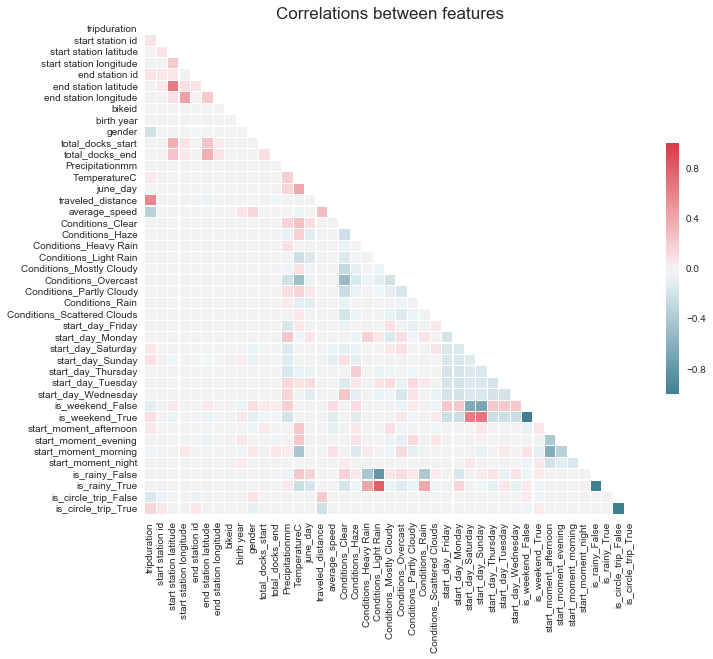

In [12]:
# Generate a mask for the upper triangle
sns.set_style('white')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, linewidths=.1, cbar_kws={"shrink": .5}, ax=ax)

plt.title('Correlations between features', fontsize=17)

## 3) Cross-validation : trying to predict customer vs. subscriber <font color='blue'>  </font>

### <font color='red'>3.1) Use the <i>seaborn</i> function <i>sns.countplot(data.column_name_here)</i> to countplot the repartition of trips per user type (i.e the <i>usertype</i> column)</font>

/Users/nathanielbern/anaconda/envs/DSTraining/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


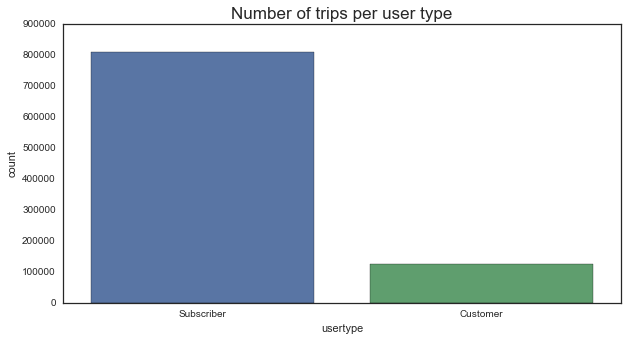

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(data['usertype'])
plt.title('Number of trips per user type', fontsize=17)

### <font color='red'> Run the following block, it will delete a few columns for predictive modeling purposes </font>

In [14]:
del data['starttime'], data['stoptime'], data['start station name'], data['end station name']
del data['gender'], data['birth year']
del data['bikeid']
del data['start station id'], data['end station id']

### <font color='red'>3.2) Show which columns will be used to predict user type </font>

In [15]:
data.columns

Index([u'tripduration', u'start station latitude', u'start station longitude',
       u'end station latitude', u'end station longitude', u'usertype',
       u'total_docks_start', u'total_docks_end', u'Precipitationmm',
       u'TemperatureC', u'june_day', u'traveled_distance', u'average_speed',
       u'Conditions_Clear', u'Conditions_Haze', u'Conditions_Heavy Rain',
       u'Conditions_Light Rain', u'Conditions_Mostly Cloudy',
       u'Conditions_Overcast', u'Conditions_Partly Cloudy', u'Conditions_Rain',
       u'Conditions_Scattered Clouds', u'start_day_Friday',
       u'start_day_Monday', u'start_day_Saturday', u'start_day_Sunday',
       u'start_day_Thursday', u'start_day_Tuesday', u'start_day_Wednesday',
       u'is_weekend_False', u'is_weekend_True', u'start_moment_afternoon',
       u'start_moment_evening', u'start_moment_morning', u'start_moment_night',
       u'is_rainy_False', u'is_rainy_True', u'is_circle_trip_False',
       u'is_circle_trip_True'],
      dtype='object')

### <font color='red'>3.3) Run the following block. It builds arrays for the features, as well as the labels. Features will be used to predict the labels. Study their structures.</font>

In [16]:
labels = np.array(data.usertype)
del data['usertype']
features = np.array(data)

In [17]:
features

array([[  1.33800000e+03,   4.07271026e+01,  -7.40029709e+01, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.90000000e+02,   4.07277913e+01,  -7.39856494e+01, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  6.34000000e+02,   4.07352380e+01,  -7.40002710e+01, ...,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  3.55700000e+03,   4.07545573e+01,  -7.39659298e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  8.19000000e+02,   4.07206644e+01,  -7.39851798e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  6.67000000e+02,   4.07130792e+01,  -7.39985119e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [18]:
labels

array(['Subscriber', 'Subscriber', 'Subscriber', ..., 'Customer',
       'Subscriber', 'Subscriber'], dtype=object)

### <font color='red'>3.4) How many observations/features do we have to make our models ? You can use the <i>shape</i> attribute of numpy arrays</font>

In [19]:
print 'Features array shape : {}'.format(features.shape)

Features array shape : (935587, 38)


### <font color='red'>3.5) Import the scikit-learn package <i>sklearn</i>, that will be used for running machine learning algorithms</font>

In [20]:
import sklearn

### <font color='red'>3.6) Binarize the labels of the dataset. You can use the following webpage:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html

In [21]:
from sklearn.preprocessing import label_binarize
binarized_labels = label_binarize(labels, classes=['Customer', 'Subscriber']).ravel()  
# Subscriber is label 1, Customer is label 0, this is a binary classification problem

### <font color='red'>3.7) Show the binarized labels</font>

In [22]:
binarized_labels

array([1, 1, 1, ..., 0, 1, 1])

### Split training and testing sets

### <font color='red'>3.8) Split your dataset between a training and testing set (of size 30%). You can use the following webpage:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html

In [23]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, binarized_labels, test_size=0.3)

### <font color='red'>3.9) Show the results of your split</font>

In [24]:
X_train

array([[  7.48000000e+02,   4.07381765e+01,  -7.39773866e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  2.66000000e+02,   4.07274079e+01,  -7.39814201e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  6.52000000e+02,   4.07220550e+01,  -7.39891110e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.59000000e+02,   4.07417760e+01,  -7.40014975e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  4.05000000e+02,   4.06876448e+01,  -7.39696890e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.02700000e+03,   4.07365020e+01,  -7.39780947e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [25]:
X_test

array([[  8.06000000e+02,   4.07423543e+01,  -7.39891508e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  6.29000000e+02,   4.07208736e+01,  -7.39808580e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  3.38900000e+03,   4.07643971e+01,  -7.39737147e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       ..., 
       [  1.05000000e+03,   4.07220550e+01,  -7.39891110e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  8.00000000e+02,   4.07622883e+01,  -7.39833618e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  1.65900000e+03,   4.07349270e+01,  -7.39920051e+01, ...,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00]])

In [26]:
y_test.shape

(280677,)

In [27]:
X_train.shape

(654910, 38)

### Random Forest classifier

### <font color='red'>3.10) Use the following webpages to compute the cross-validation score of a Random Forest classifier, on the training set:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.cross_val_score.html#sklearn.cross_validation.cross_val_score

You will be asked to set the attribute <i>scoring</i> of <i>cross_val_score</i> to 'roc_auc', as explained during the session.

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

### <font color='red'>Run the following block. It will compute a 3-fold cross-validation score using the </font><b>AUC scoring metric</b>,  <font color='red'>as explained in the slides</font>

In [38]:
from sklearn.cross_validation import cross_val_score
cross_val_score(rf, X_train, y_train, scoring='roc_auc')

array([ 0.83016552,  0.83035547,  0.82967266])

### <font color='red'>3.11) Take some time to run as well as understand the following block. 

<b>This does exactly as <i>cross_val_score</i> function from the block above, but it is coded such that you will understand what happens at each iteration, as well as plot the ROC curve for every cross-validation split</b>. You can use the following webpages:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedKFold.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
- http://scikit-learn.org/stable/modules/generated/sklearn.metrics.auc.html

Fold 1
Fold 2
Fold 3


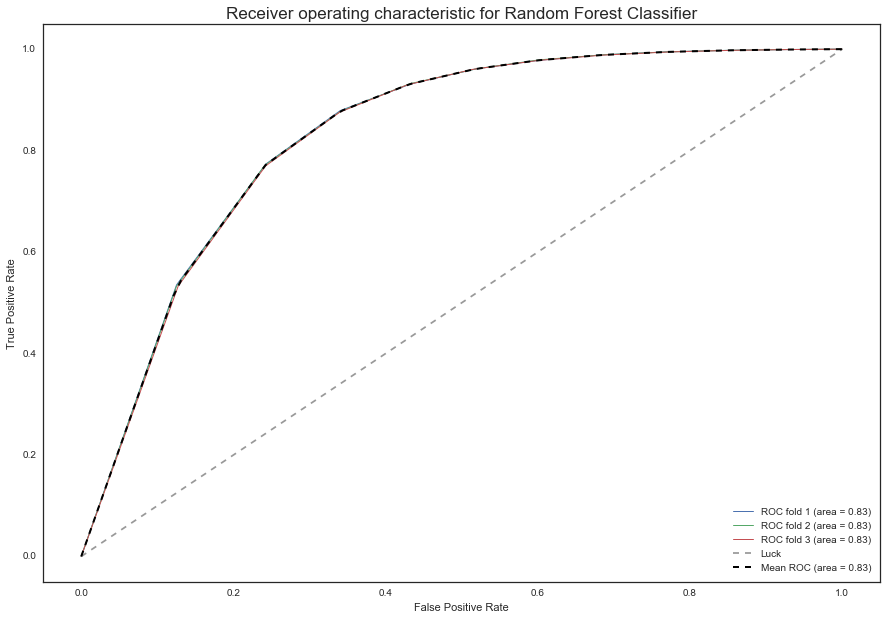

In [39]:
from scipy import interp

from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import StratifiedKFold

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y_train, n_folds=3)
classifier = RandomForestClassifier()

mean_tpr = 0.
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

plt.figure(figsize=(15,10))
for i, (train, test) in enumerate(cv,1):
    print 'Fold {}'.format(i)
    probas_ = classifier.fit(X_train[train], y_train[train]).predict_proba(X_train[test])
    # Compute ROC curve and area under the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for Random Forest Classifier',fontsize=17)
plt.legend(loc="lower right")
plt.show()

## 4) Final fit and plots <font color='blue'>  </font>

### <font color='red'>4.1) Define a random forest classifier, and fit it on the training set. You can return on:</font>
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [40]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### <font color='red'>4.2) Show the features importances using the <i>.feature_importances</i> attribute. You can get hints on the following page:</font>
- http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html

In [41]:
rf.feature_importances_

array([ 0.1476889 ,  0.07332282,  0.06882861,  0.07503102,  0.06808001,
        0.04862689,  0.04699136,  0.01171859,  0.04986301,  0.02969368,
        0.08890082,  0.1774884 ,  0.00801509,  0.0034821 ,  0.00038407,
        0.00092388,  0.00523882,  0.00680523,  0.00441251,  0.00043387,
        0.00364538,  0.00410949,  0.00429229,  0.00327738,  0.00541405,
        0.00430903,  0.00415951,  0.00435081,  0.00873838,  0.0108246 ,
        0.00691769,  0.00566218,  0.00566336,  0.00312637,  0.00119049,
        0.0011468 ,  0.00294143,  0.00430109])

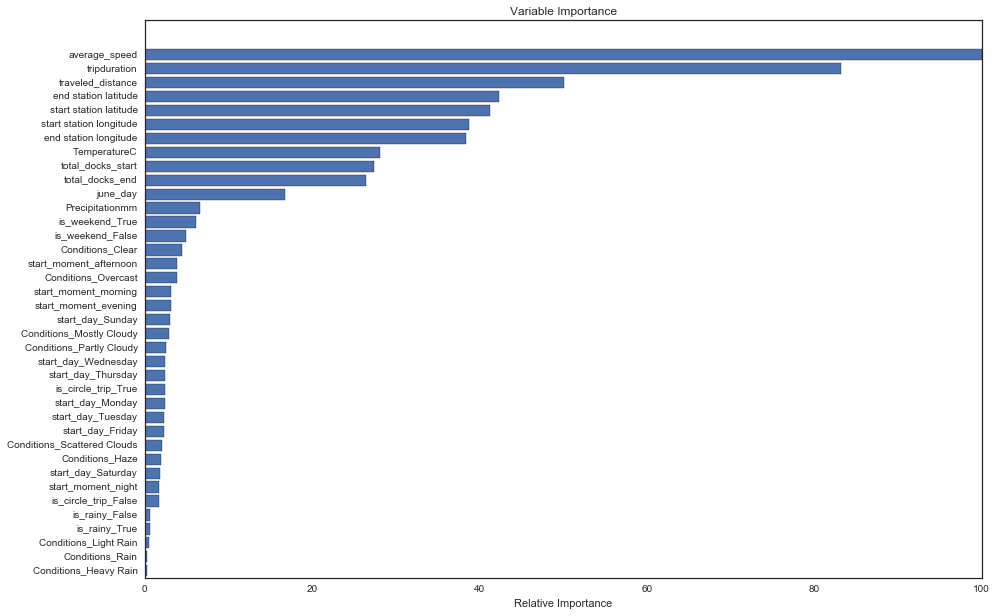

In [42]:
# Plot feature importance
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(15,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### <font color='red'>4.3) Get the final performance on test set, using <i>roc_auc_score</i></font>

In [43]:
from sklearn.metrics import roc_auc_score

y_predict_test = rf.predict_proba(X_test)[:,1]
print 'Final AUC score on test set : {:.2f}'.format(roc_auc_score(y_test, y_predict_test))

Final AUC score on test set : 0.84


### <font color='red'>4.4) Using <i>seaborn.distplot</i>, plot the distribution of trip durations with respect to user type (whether "Subscriber" or "Customer")</font>

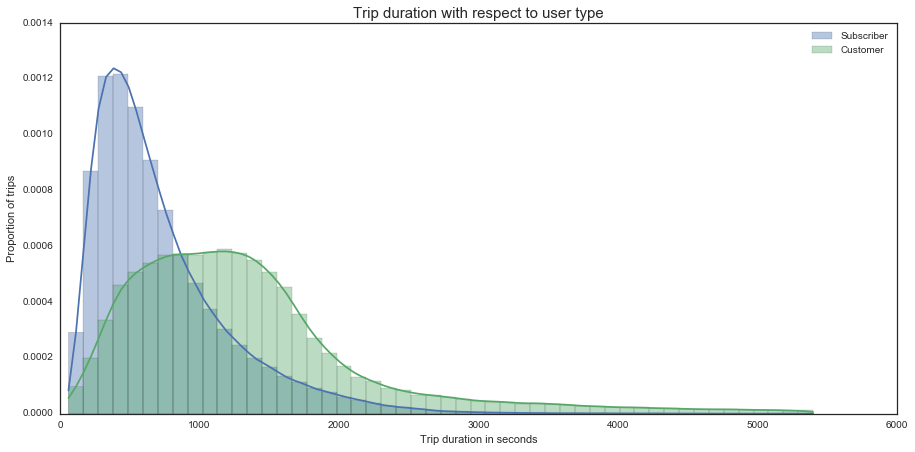

In [39]:
plt.figure(figsize=(15,7))
sns.distplot(raw_data[raw_data['usertype']=="Subscriber"]["tripduration"])
sns.distplot(raw_data[raw_data['usertype']=="Customer"]["tripduration"])
plt.title('Trip duration with respect to user type', fontsize=15)
plt.xlabel("Trip duration in seconds")
plt.ylabel("Proportion of trips")
plt.legend(["Subscriber","Customer"])
plt.show()

### <font color='red'>4.5) Using <i>seaborn.distplot</i>, plot the distribution of average speed with respect to user type (whether "Subscriber" or "Customer")</font>

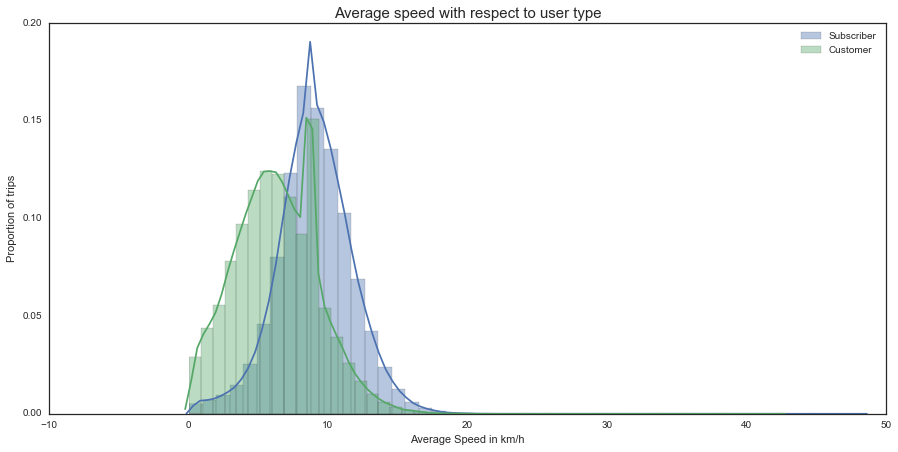

In [38]:
plt.figure(figsize=(15,7))
sns.distplot(raw_data[raw_data['usertype']=="Subscriber"]["average_speed"])
sns.distplot(raw_data[raw_data['usertype']=="Customer"]["average_speed"])
plt.title('Average speed with respect to user type', fontsize=15)
plt.xlabel("Average Speed in km/h")
plt.ylabel("Proportion of trips")
plt.legend(["Subscriber","Customer"])
plt.show()

### <font color='red'>4.6) Run the following block to understand how fine-tuning parameters can help improve the performance of your models. Warning : this will take some time to run !</font>

In [46]:
rf = RandomForestClassifier(max_depth=20,max_features=10,n_estimators=50)
cross_val_score(rf, X_train, y_train, scoring='roc_auc')

array([ 0.86350266,  0.8638934 ,  0.86441677])

# Free exploration/modeling of the dataset, for instance: <font color='blue'>  </font>
- Try to use other algorithms
- Try to enrich with other data (taxi trips, points of interests in neighborhoods)
- Try to predict other phenomena
- ....

## Example : using a Logistic Regression

#### Scale features for Logistic Regression

In [50]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Cross-validate with ROC AUC

Fold 1
Fold 2
Fold 3
Fold 4
Fold 5


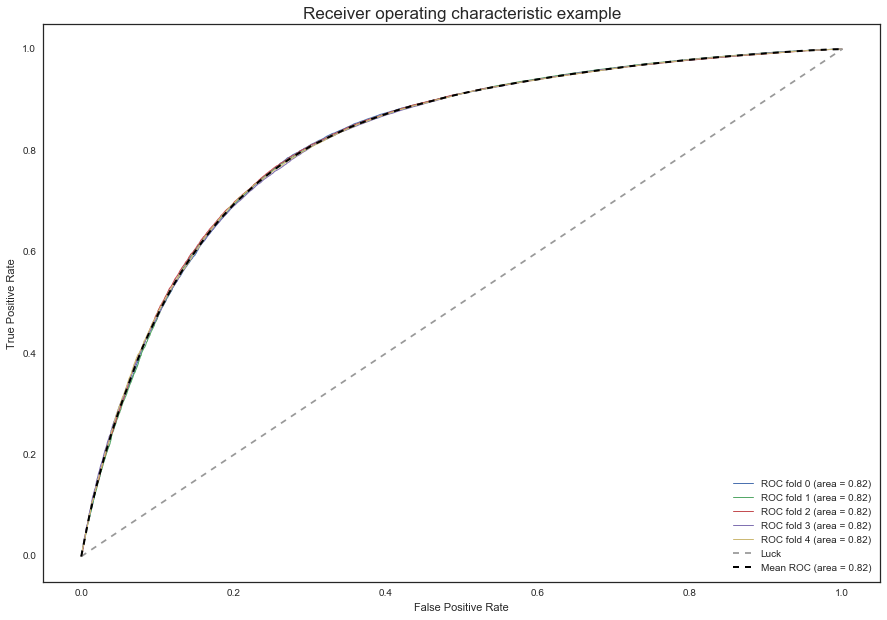

In [51]:
from sklearn.linear_model import LogisticRegression

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(y_train, n_folds=5)
classifier = LogisticRegression()

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

plt.figure(figsize=(15,10))
for i, (train, test) in enumerate(cv):
    print 'Fold {}'.format(i+1)
    probas_ = classifier.fit(X_train_scaled[train], y_train[train]).predict_proba(X_train_scaled[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_train[test], probas_[:, 1], pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)

plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example',fontsize=17)
plt.legend(loc="lower right")
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_predict_test = lr.predict_proba(X_test_scaled)[:,1]
print 'Final AUC score for Logistic Regression on test set : {:.2f}'.format(roc_auc_score(y_test, y_predict_test))

Final AUC score for Logistic Regression on test set : 0.82
